In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

In [63]:
df=pd.read_csv('/content/drive/MyDrive/708 course/708 Assessment2/house_price.csv')

In [64]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [65]:
df.shape

(1460, 81)

In [66]:
df.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


In [67]:
missing_values = df.isnull().sum()
missing_columns = missing_values[missing_values > 0]
print("Missing values in each column:")
print(missing_columns)

Missing values in each column:
LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [68]:
df.fillna("None", inplace=True)
df.isnull().sum()

<ipython-input-68-1650e584ba26>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna("None", inplace=True)


,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,0
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


In [69]:
df.dtypes

,0
Id,int64
MSSubClass,int64
MSZoning,object
LotFrontage,object
LotArea,int64
...,...
MoSold,int64
YrSold,int64
SaleType,object
SaleCondition,object


In [70]:
df.duplicated().sum()

0

In [71]:
df.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,567.240411,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,441.866955,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,0.000000,477.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,0.000000,808.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [72]:
# numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns
print("Numeric columns:")
print(numeric_columns)

Numeric columns:
Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [73]:
def find_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# only on Saleprice
houseprice_outliers = find_outliers_iqr(df, 'SalePrice')
houseprice_outliers

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
11,12,60,RL,85.0,11924,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,7,2006,New,Partial,345000
53,54,20,RL,68.0,50271,Pave,None,IR1,Low,AllPub,...,0,None,None,None,0,11,2006,WD,Normal,385000
58,59,60,RL,66.0,13682,Pave,None,IR2,HLS,AllPub,...,0,None,None,None,0,10,2006,New,Partial,438780
112,113,60,RL,77.0,9965,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,10,2007,New,Partial,383970
151,152,20,RL,107.0,13891,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,1,2008,New,Partial,372402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,1269,50,RL,None,14100,Pave,None,IR1,Lvl,AllPub,...,0,None,GdWo,None,0,5,2008,WD,Normal,381000
1353,1354,50,RL,56.0,14720,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,3,2010,WD,Normal,410000
1373,1374,20,RL,None,11400,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,3,2007,WD,Normal,466500
1388,1389,20,RL,42.0,14892,Pave,None,IR1,HLS,AllPub,...,0,None,None,None,0,10,2009,WD,Normal,377500


In [74]:
# drop outliers
df= df.drop(houseprice_outliers.index)

In [75]:
'''
# remove outliers
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_no_outliers

df_no_outliers = df.copy()
for col in numeric_columns:
    df_no_outliers = remove_outliers_iqr(df_no_outliers, col)

print("\nDataFrame after removing outliers:\n", df_no_outliers)
'''

'\n# remove outliers\ndef remove_outliers_iqr(df, column):\n    Q1 = df[column].quantile(0.25)\n    Q3 = df[column].quantile(0.75)\n    IQR = Q3 - Q1\n    lower_bound = Q1 - 1.5 * IQR\n    upper_bound = Q3 + 1.5 * IQR\n    df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]\n    return df_no_outliers\n\ndf_no_outliers = df.copy()\nfor col in numeric_columns:\n    df_no_outliers = remove_outliers_iqr(df_no_outliers, col)\n\nprint("\nDataFrame after removing outliers:\n", df_no_outliers)\n'

In [76]:
categorical_columns = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
df_encoded

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,706,0,150,...,False,False,False,False,True,False,False,False,True,False
1,2,20,9600,6,8,1976,1976,978,0,284,...,False,False,False,False,True,False,False,False,True,False
2,3,60,11250,7,5,2001,2002,486,0,434,...,False,False,False,False,True,False,False,False,True,False
3,4,70,9550,7,5,1915,1970,216,0,540,...,False,False,False,False,True,False,False,False,False,False
4,5,60,14260,8,5,2000,2000,655,0,490,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0,0,953,...,False,False,False,False,True,False,False,False,True,False
1456,1457,20,13175,6,6,1978,1988,790,163,589,...,False,False,False,False,True,False,False,False,True,False
1457,1458,70,9042,7,9,1941,2006,275,0,877,...,False,False,False,False,True,False,False,False,True,False
1458,1459,20,9717,5,6,1950,1996,49,1029,0,...,False,False,False,False,True,False,False,False,True,False


In [77]:
scaler=StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_encoded), columns=df_encoded.columns)
df_scaled

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-1.733090,0.058720,-0.204916,0.792970,-0.528822,1.097354,0.917091,0.674064,-0.292015,-0.953955,...,-0.053548,-0.05989,-0.263765,-0.046357,0.360622,-0.053548,-0.089023,-0.120429,0.442410,-0.268385
1,-1.730724,-0.876115,-0.066726,0.012826,2.154935,0.197316,-0.390176,1.309209,-0.292015,-0.641765,...,-0.053548,-0.05989,-0.263765,-0.046357,0.360622,-0.053548,-0.089023,-0.120429,0.442410,-0.268385
2,-1.728358,0.058720,0.131547,0.792970,-0.528822,1.030684,0.868673,0.160344,-0.292015,-0.292298,...,-0.053548,-0.05989,-0.263765,-0.046357,0.360622,-0.053548,-0.089023,-0.120429,0.442410,-0.268385
3,-1.725992,0.292428,-0.072734,0.792970,-0.528822,-1.836103,-0.680680,-0.470131,-0.292015,-0.045342,...,-0.053548,-0.05989,-0.263765,-0.046357,0.360622,-0.053548,-0.089023,-0.120429,-2.260347,-0.268385
4,-1.723626,0.058720,0.493245,1.573115,-0.528822,0.997350,0.771839,0.554974,-0.292015,-0.161830,...,-0.053548,-0.05989,-0.263765,-0.046357,0.360622,-0.053548,-0.089023,-0.120429,0.442410,-0.268385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394,1.709388,0.058720,-0.268964,0.012826,-0.528822,0.964015,0.771839,-0.974511,-0.292015,0.916857,...,-0.053548,-0.05989,-0.263765,-0.046357,0.360622,-0.053548,-0.089023,-0.120429,0.442410,-0.268385
1395,1.711754,-0.876115,0.362866,0.012826,0.365763,0.263985,0.190831,0.870212,0.710504,0.068818,...,-0.053548,-0.05989,-0.263765,-0.046357,0.360622,-0.053548,-0.089023,-0.120429,0.442410,-0.268385
1396,1.714120,0.292428,-0.133778,0.792970,3.049521,-0.969400,1.062343,-0.332361,-0.292015,0.739794,...,-0.053548,-0.05989,-0.263765,-0.046357,0.360622,-0.053548,-0.089023,-0.120429,0.442410,-0.268385
1397,1.716486,-0.876115,-0.052666,-0.767319,0.365763,-0.669387,0.578170,-0.860092,6.036772,-1.303422,...,-0.053548,-0.05989,-0.263765,-0.046357,0.360622,-0.053548,-0.089023,-0.120429,0.442410,-0.268385


In [78]:
X = df_scaled.drop(columns='SalePrice')
y = df_scaled['SalePrice']

# define test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
# linear regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)

# Lasso regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

# Ridge regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

print("Linear Coefficients:", linear_model.coef_[:5])
print("Linear Intercept:", linear_model.intercept_)
print("Linear Mean Squared Error:", mse_linear)

print("Lasso Coefficients:", lasso_model.coef_[:5])
print("Lasso Intercept:", lasso_model.intercept_)
print("Lasso Mean Squared Error:", mse_lasso)

print("Ridge Coefficients:", ridge_model.coef_[:5])
print("Ridge Intercept:", ridge_model.intercept_)
print("Ridge Mean Squared Error:", mse_ridge)


Linear Coefficients: [-0.00840048  0.02745879  0.07433608  0.11992927  0.10271294]
Linear Intercept: 660162905321.8214
Linear Mean Squared Error: 1.9403372613165597e+27
Lasso Coefficients: [-0.         -0.          0.          0.31007034  0.        ]
Lasso Intercept: 0.003167164207034605
Lasso Mean Squared Error: 0.17475123216737987
Ridge Coefficients: [-0.00834121  0.01905115  0.07309235  0.11855743  0.10204271]
Ridge Intercept: 0.002238949176836532
Ridge Mean Squared Error: 0.17353239528608685


In [80]:
# find the features Lasso reserved
feature_names = X_train.columns
non_zero_indices = lasso_model.coef_ != 0
selected_features = feature_names[non_zero_indices]

print("Selected Features by Lasso Regression:", selected_features)
print("Number of selected features:", len(selected_features))

Selected Features by Lasso Regression: Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'TotalBsmtSF',
       'GrLivArea', 'BsmtFullBath', 'Fireplaces', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'MSZoning_RM', 'Condition2_PosN', 'MasVnrArea_762.0',
       'MasVnrArea_796.0', 'ExterQual_Gd', 'BsmtExposure_Gd',
       'BsmtFinType1_GLQ', 'KitchenQual_TA', 'FireplaceQu_None',
       'GarageType_Attchd'],
      dtype='object')
Number of selected features: 21


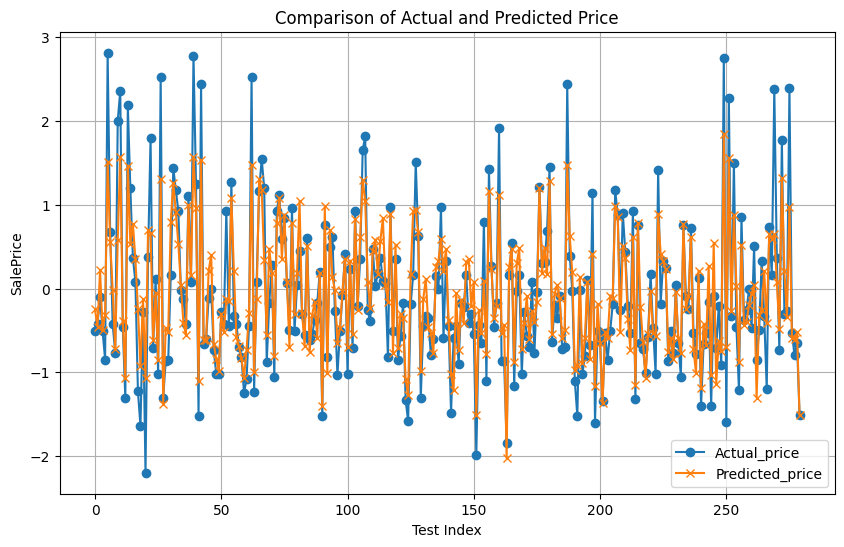

In [81]:
# test value and predicted value
actual_values = np.array(y_test)
predicted_values = y_pred_lasso

# create the plot to vasulize the difference
plt.figure(figsize=(10, 6))
plt.plot(actual_values, label='Actual_price', marker='o')
plt.plot(predicted_values, label='Predicted_price', marker='x')
plt.xlabel('Test Index')
plt.ylabel('SalePrice')
plt.title('Comparison of Actual and Predicted Price')
plt.legend()
plt.grid(True)
plt.show()

In [82]:
# define the hyperparameter grid
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# hyperparameter tuning with grid search
lasso = Lasso()
grid_search_lasso = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')

# train the model
grid_search_lasso.fit(X_train, y_train)

# find the best model
best_lasso = grid_search_lasso.best_estimator_
y_pred_lasso = best_lasso.predict(X_test)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f"Best Lasso alpha: {grid_search_lasso.best_params_['alpha']}")
print(f"Lasso Mean Squared Error: {mse_lasso}")

Best Lasso alpha: 0.01
Lasso Mean Squared Error: 0.0989249627883156


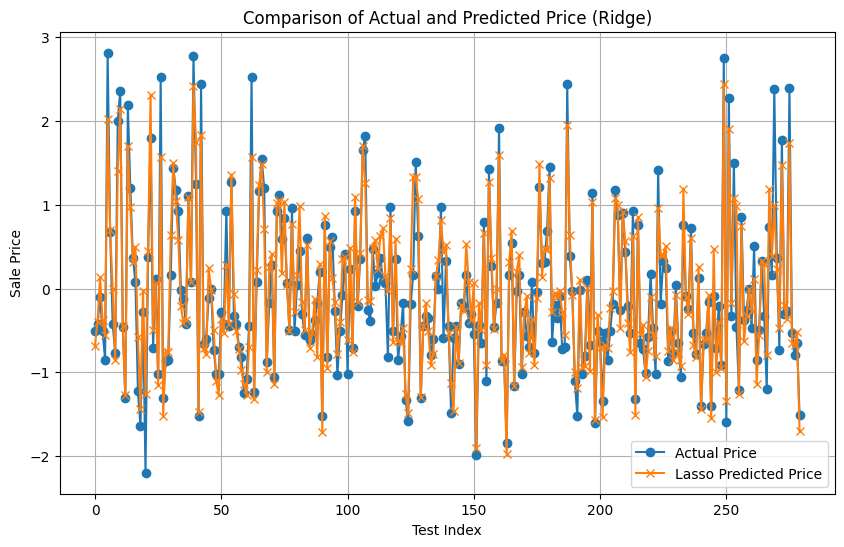

In [83]:
# build model using the best alpha value
lasso_model2 = Lasso(alpha=0.01)
lasso_model2.fit(X_train, y_train)

# predict
y_pred_lasso2 = lasso_model2.predict(X_test)
actual_values = np.array(y_test)
predicted_values_lasso = y_pred_lasso2

# create comparison plot
plt.figure(figsize=(10, 6))
plt.plot(actual_values, label='Actual Price', marker='o')
plt.plot(predicted_values_lasso, label='Lasso Predicted Price', marker='x')
plt.xlabel('Test Index')
plt.ylabel('Sale Price')
plt.title('Comparison of Actual and Predicted Price (Ridge)')
plt.legend()
plt.grid(True)
plt.show()

In [84]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred_lasso2)
mse = mean_squared_error(y_test, y_pred_lasso2)
r2 = r2_score(y_test, y_pred_lasso2)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R^2): {r2}")

Mean Absolute Error (MAE): 0.22096887098364743
Mean Squared Error (MSE): 0.0989249627883156
R-squared (R^2): 0.8909710077200131


In [85]:
from sklearn.model_selection import KFold

model = Lasso(alpha=0.01)

# initiate the Kfold model
kf = KFold(n_splits=5, shuffle=True, random_state=1)

# iterate each fold
fold_results = []
best_fold_index = None
best_fold_mse = float('inf')
for i, (train_index, test_index) in enumerate(kf.split(X), start=1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # train
    model.fit(X_train, y_train)
    # predict
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    fold_results.append(mse)
    # find the best fold
    if mse < best_fold_mse:
        best_fold_mse = mse
        best_fold_index = i

for i, result in enumerate(fold_results, 1):
    print(f"Fold {i} - Mean Squared Error: {result}")
print(f"Best Fold: {best_fold_index} with MSE: {best_fold_mse}")


Fold 1 - Mean Squared Error: 0.20297877027656547
Fold 2 - Mean Squared Error: 0.12187431620678787
Fold 3 - Mean Squared Error: 0.09395768862834634
Fold 4 - Mean Squared Error: 0.10554499027763072
Fold 5 - Mean Squared Error: 0.3324138461749327
Best Fold: 3 with MSE: 0.09395768862834634


Final Model Mean Squared Error on Best Fold Test Data: 0.09395768862834634
Final Model Intercept: -0.0007014095864802767
R-squared (R^2): 0.9161380231475902


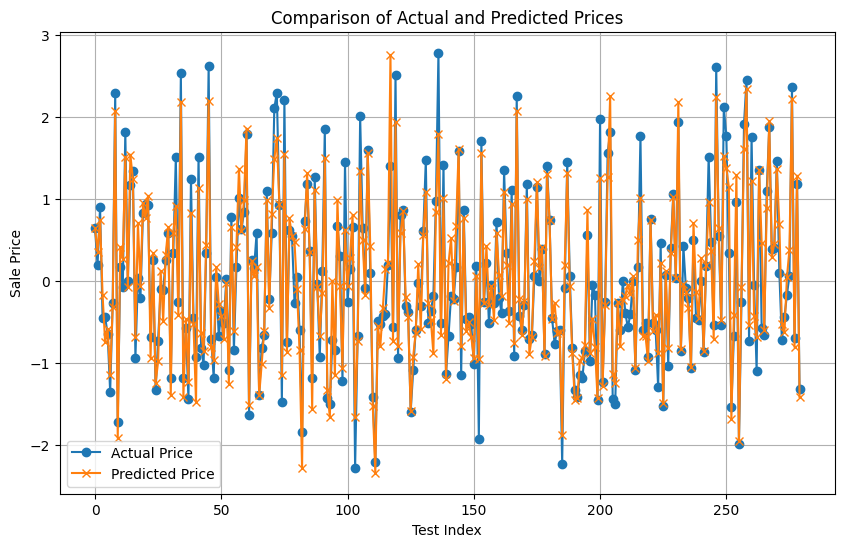

In [86]:
# use the best fold to split the data
best_train_index, best_test_index = list(kf.split(X))[best_fold_index - 1]
X_best_train, X_best_test = X.iloc[best_train_index], X.iloc[best_test_index]
y_best_train, y_best_test = y.iloc[best_train_index], y.iloc[best_test_index]

# Lasso with the best alpha
final_model = Lasso(alpha=0.01)
final_model.fit(X_best_train, y_best_train)

final_y_pred = final_model.predict(X_best_test)

final_mse = mean_squared_error(y_best_test, final_y_pred)
final_r2 = r2_score(y_best_test, final_y_pred)

print(f"Final Model Mean Squared Error on Best Fold Test Data: {final_mse}")
print("Final Model Intercept:", final_model.intercept_)
print(f"R-squared (R^2): {final_r2}")

# visualization
plt.figure(figsize=(10, 6))
plt.plot(y_best_test.values, label='Actual Price', marker='o')
plt.plot(final_y_pred, label='Predicted Price', marker='x')
plt.xlabel('Test Index')
plt.ylabel('Sale Price')
plt.title('Comparison of Actual and Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()


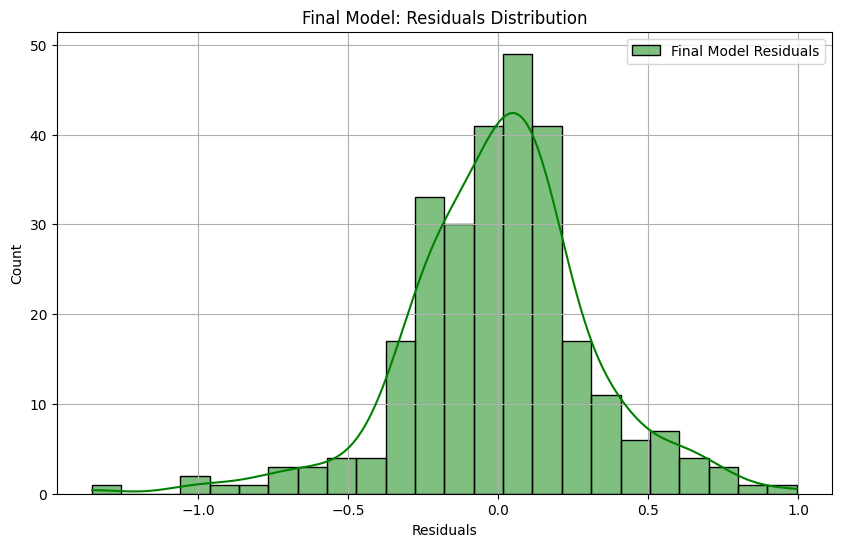

In [87]:
# calculate residuals
final_residuals = y_best_test - final_y_pred

# visualize residuals
plt.figure(figsize=(10, 6))
sns.histplot(final_residuals, kde=True, color='green', label='Final Model Residuals')
plt.xlabel('Residuals')
plt.title('Final Model: Residuals Distribution')
plt.legend()
plt.grid(True)
plt.show()

In [88]:
# find the top 20 features coefficient
coefficients = final_model.coef_

coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
})

coef_df['Absolute_Coefficient'] = np.abs(coef_df['Coefficient'])
sorted_coef_df = coef_df.sort_values(by='Absolute_Coefficient', ascending=False)

print("Most Influential Features:")
print(sorted_coef_df.head(20))

Most Influential Features:
                  Feature  Coefficient  Absolute_Coefficient
14              GrLivArea     0.374407              0.374407
3             OverallQual     0.205715              0.205715
543      MasVnrArea_796.0    -0.200963              0.200963
196       Condition2_PosN    -0.119541              0.119541
5               YearBuilt     0.117611              0.117611
4             OverallCond     0.087844              0.087844
7              BsmtFinSF1     0.079696              0.079696
10            TotalBsmtSF     0.078648              0.078648
181  Neighborhood_Somerst     0.070336              0.070336
176  Neighborhood_NridgHt     0.062207              0.062207
554          ExterQual_TA    -0.061826              0.061826
2                 LotArea     0.055647              0.055647
24             GarageArea     0.055072              0.055072
36            MSZoning_RL     0.053164              0.053164
23             GarageCars     0.050322              0.0503